MNIST Classifier using XGboost

by Yoihen Elangbam

Import Dataset

In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Load the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1)

X, y = mnist['data'], mnist['target']

# Convert labels to integers
y = y.astype(int)

# Normalize
X = X / 255.0

# train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print("MNIST dataset structure:")
print("Data shape:", X.shape)


MNIST dataset structure:
Data shape: (70000, 784)


In [ ]:
Fit our Ensemble Model (XGBoost)

In [3]:
# Create an XGBoost classifier with 100 estimators
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Fit the model with evaluation set for tracking metrics
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_clf.fit(X_train, y_train, eval_set=eval_set, verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:30:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.35320	validation_1-mlogloss:1.37428
[1]	validation_0-mlogloss:1.02236	validation_1-mlogloss:1.05311
[2]	validation_0-mlogloss:0.80285	validation_1-mlogloss:0.83910
[3]	validation_0-mlogloss:0.65129	validation_1-mlogloss:0.69381
[4]	validation_0-mlogloss:0.53645	validation_1-mlogloss:0.58318
[5]	validation_0-mlogloss:0.44882	validation_1-mlogloss:0.49899
[6]	validation_0-mlogloss:0.37798	validation_1-mlogloss:0.43105
[7]	validation_0-mlogloss:0.32173	validation_1-mlogloss:0.37707
[8]	validation_0-mlogloss:0.27715	validation_1-mlogloss:0.33491
[9]	validation_0-mlogloss:0.24156	validation_1-mlogloss:0.30130
[10]	validation_0-mlogloss:0.21234	validation_1-mlogloss:0.27346
[11]	validation_0-mlogloss:0.18816	validation_1-mlogloss:0.25070
[12]	validation_0-mlogloss:0.16767	validation_1-mlogloss:0.23120
[13]	validation_0-mlogloss:0.15029	validation_1-mlogloss:0.21586
[14]	validation_0-mlogloss:0.13473	validation_1-mlogloss:0.20154
[15]	validation_0-mlogloss:0.12221	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Save our Model

In [13]:
import joblib

joblib.dump(xgb_clf, 'xgb_classifier.joblib')

['xgb_classifier.joblib']

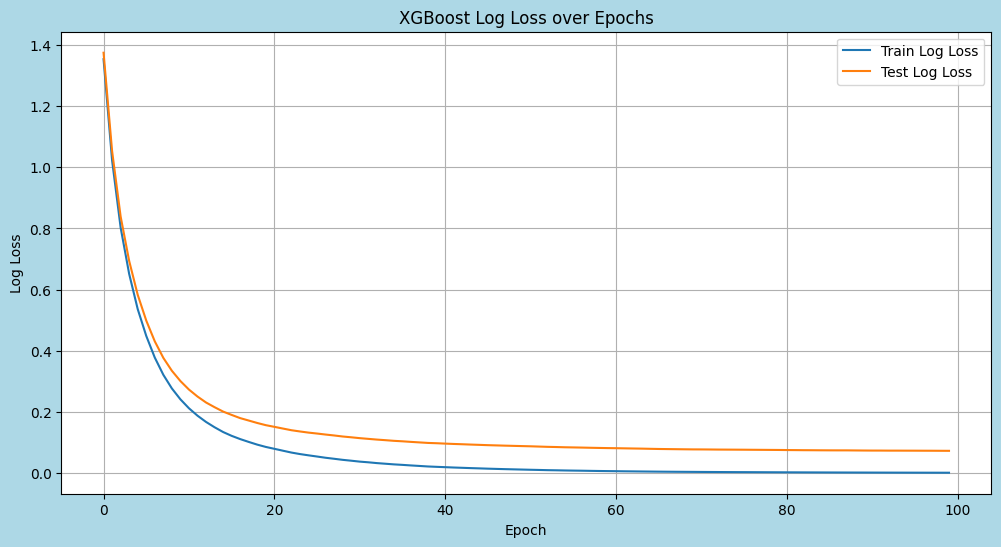

In [23]:
results = xgb_clf.evals_result()

# Extracting the log losses for training and validation
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# Plot Log Loss for training and validation sets
plt.figure(figsize=(12, 6),facecolor='lightblue')
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train Log Loss')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Test Log Loss')
plt.title('XGBoost Log Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
y_pred = xgb_clf.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9781


Test

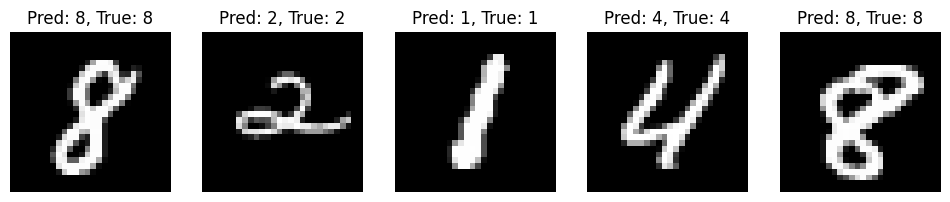

In [18]:
model = joblib.load('xgb_classifier.joblib') #just wanted to test this out

num_images_to_plot = 5
valid_indices = X_test.index.values
random_indices = np.random.choice(valid_indices, size=num_images_to_plot, replace=False)

plt.figure(figsize=(12, 6))

for i, index in enumerate(random_indices):

    image = X_test.loc[index].values.reshape(28, 28)
    predicted_label = model.predict(X_test.loc[[index]].values)[0]
    true_label = y_test.loc[index]
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Pred: {predicted_label}, True: {true_label}")
    plt.axis('off')
plt.show()